<a href="https://colab.research.google.com/github/spilt-n-merge/my-work/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Image Classification Using CNN*

# CIFAR10

### importing required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Importing Data

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Ploting Some Sample Data

In [ ]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

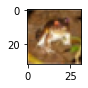

In [ ]:
plot_sample(0)

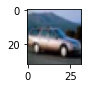

In [ ]:
plot_sample(4)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[3][0]

4

In [ ]:
classes[y_train[3][0]]

'deer'

### Scaling

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### one hot encoding

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Building

In [ ]:

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(2000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# when you have one hot encoded values use categorical_crossentropy 
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9269 - accuracy: 0.3081
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6354 - accuracy: 0.4178
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5392 - accuracy: 0.4547
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4696 - accuracy: 0.4788
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4163 - accuracy: 0.4985
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3655 - accuracy: 0.5176
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3214 - accuracy: 0.5323
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2803 - accuracy: 0.5445
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2407 - accuracy: 0.5612
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.209

### Prediction

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[9999])]

'horse'

In [ ]:
classes[y_test[9999][0]]

'horse'